In [1]:
import numpy as np
import pandas as pd

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv ('gene_high_throughput_sequencing.csv', sep = ',')

In [7]:
data.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


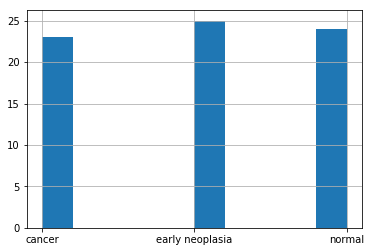

In [11]:
data['Diagnosis'].hist()

In [14]:
data.shape

(72, 15750)

In [22]:
data_norm = data[data['Diagnosis']== 'normal']
data_earl = data[data['Diagnosis']== 'early neoplasia']
data_can = data[data['Diagnosis']== 'cancer']

In [23]:
data_norm.mean()

LOC643837         2.681277
LOC100130417      4.368497
SAMD11           15.159566
NOC2L            15.374351
KLHL17           21.459886
PLEKHN1           9.374537
C1orf170          8.105567
HES4             58.080871
ISG15            34.983861
AGRN             62.870812
C1orf159         40.998143
LOC254099         5.765640
TTLL10            7.570590
TNFRSF18         20.431867
TNFRSF4          21.445479
SDF4             85.687978
B3GALT6          18.973388
FAM132A          15.637257
UBE2J2           47.335983
SCNN1D           40.180920
ACAP3            60.390477
PUSL1            22.005108
CPSF3L           61.147919
GLTPD1           37.209867
DVL1             33.662830
MXRA8           102.774844
AURKAIP1         73.471133
CCNL2            45.276912
LOC148413        15.811723
MRPL20           23.260916
                   ...    
DNASE1L1         19.837260
TAZ              30.695763
ATP6AP1          86.389337
GDI1             68.705681
FAM50A           50.036077
PLXNA3           26.239860
L

# Применение критерия Стьюдента для двух независимых выборок (без учета множественной проверки)

In [28]:
import scipy.stats

In [34]:
data.iloc[:,0]

0     STT5425_Breast_001_normal
1     STT5427_Breast_023_normal
2     STT5430_Breast_002_normal
3     STT5439_Breast_003_normal
4     STT5441_Breast_004_normal
5     STT5446_Breast_005_normal
6     STT5451_Breast_006_normal
7     STT5466_Breast_007_normal
8     STT5472_Breast_008_normal
9     STT5475_Breast_009_normal
10    STT5502_Breast_010_normal
11    STT5510_Breast_011_normal
12    STT5570_Breast_013_normal
13    STT5573_Breast_014_normal
14    STT5576_Breast_015_normal
15    STT5611_Breast_017_normal
16    STT5617_Breast_019_normal
17    STT5620_Breast_018_normal
18    STT5668_Breast_020_normal
19    STT5749_Breast_021_normal
20    STT5756_Breast_022_normal
21    STT5761_Breast_022_normal
22    STT5828_Breast_024_normal
23    STT5831_Breast_024_normal
24        STT5424_Breast_001_EN
25        STT5431_Breast_002_EN
26        STT5442_Breast_004_EN
27        STT5445_Breast_005_EN
28        STT5511_Breast_011_EN
29        STT5426_Breast_023_EN
                ...            
42      

In [35]:
for i in range (2,data.shape[1]):
    if i == 2:
        p_val_n_e = np.array (scipy.stats.ttest_ind(data_norm.iloc[:,i], data_earl.iloc[:,i], equal_var = False)[1])
    else:
        p_val_n_e = np.append (p_val_n_e, scipy.stats.ttest_ind(data_norm.iloc[:,i], data_earl.iloc[:,i], equal_var = False)[1])

In [38]:
count1 = 0
for i in p_val_n_e:
    if i <0.05:
        count1 +=1
print count1

1575


In [40]:
for i in range (2,data.shape[1]):
    if i == 2:
        p_val_e_c = np.array (scipy.stats.ttest_ind(data_earl.iloc[:,i], data_can.iloc[:,i], equal_var = False)[1])
    else:
        p_val_e_c = np.append (p_val_e_c, scipy.stats.ttest_ind(data_earl.iloc[:,i], data_can.iloc[:,i], equal_var = False)[1])

In [42]:
count2 = 0
for i in p_val_e_c:
    if i <0.05:
        count2 +=1
print count2

3490


In [77]:
answer1 = open ('answer1_1.txt', 'w')
answer1.write (str(count1))
answer1.close()
answer1_1 = open ('answer1_2.txt', 'w')
answer1_1.write (str(count2))
answer1_1.close()

# Применение поправки на множественную проверку гипотез методом Холма, с поправкой Бонферони на то что кол-во тестов * 2 (те 0.05/2)

In [45]:
import statsmodels.stats.multitest as smm

In [53]:
trfl_1 = smm.multipletests (p_val_n_e, alpha = 0.025, method='h')

In [51]:
count3 = 0
for i in trfl_1[0]:
    if i == True:
        count3 +=1
print count3

2


In [66]:
trfl_2 = smm.multipletests (p_val_e_c, alpha = 0.025, method='h')

In [55]:
count4 = 0
for i in trfl_2[0]:
    if i == True:
        count4 +=1
print count4

79


In [57]:
count_true = 0
for i in range (len(p_val_n_e)):
    if trfl_1[0][i] == True:
        c_t = data_norm.iloc[:,i+2].mean()/data_earl.iloc[:,i+2].mean()
        t_c = data_earl.iloc[:,i+2].mean()/data_norm.iloc[:,i+2].mean()
        print c_t, t_c
        if abs(c_t) > 1.5 or abs (t_c)>1.5:
            count_true +=1
print count_true

0.662345751693 1.50978548204
0.506363042648 1.97486766564
2


In [59]:
count_true2 = 0
for i in range (len(p_val_e_c)):
    if trfl_2[0][i] == True:
        c_t = data_earl.iloc[:,i+2].mean()/data_can.iloc[:,i+2].mean()
        t_c = data_can.iloc[:,i+2].mean()/data_earl.iloc[:,i+2].mean()
        print c_t, t_c
        if abs(c_t) > 1.5 or abs (t_c)>1.5:
            count_true2 +=1
print count_true2

0.542340491815 1.84386011204
2.38320974415 0.419602178303
1.99738074082 0.500655673485
1.69342761144 0.590518303378
1.79563968436 0.55690459991
2.11952258723 0.471804361051
1.63002308255 0.613488244863
2.44923266841 0.40829114069
3.033566156 0.329645027857
2.79378540309 0.357937298582
2.12593349477 0.470381600582
1.93779594564 0.516050207583
1.67439355036 0.59723115858
2.00497753952 0.498758704418
4.36483977332 0.22910348419
2.32349962603 0.43038526402
1.74724270238 0.572330334325
2.04564868374 0.488842491845
1.64752394755 0.606971450391
2.73697372929 0.365367043643
2.14045835529 0.467189654744
1.54883106428 0.64564820726
2.57649901789 0.388123571193
1.85423080254 0.539307187988
2.90551507352 0.344173055275
0.436911627916 2.28879236922
2.67593247265 0.373701507875
2.2089634178 0.452701023449
2.00240242001 0.499400115584
2.15360832016 0.464336987668
1.81647501224 0.550516793934
1.71870946564 0.581831903526
2.12017726317 0.471658675607
1.99635969513 0.500911735717
2.09338186534 0.4776959

In [78]:
answer2 = open ('answer2_1.txt', 'w')
answer2.write (str(count_true))
answer2.close()
answer2_2 = open ('answer2_2.txt', 'w')
answer2_2.write (str(count_true2))
answer2_2.close()

# Применение поправки на множественную проверку гипотез методом Бенжамини-Хохберта, с поправкой Бонферони на то что кол-во тестов * 2 (те 0.05/2

In [62]:
trfl_3 = smm.multipletests (p_val_n_e, alpha = 0.025, method='fdr_bh')

In [67]:
count5 = 0
for i in trfl_3[0]:
    if i == True:
        count5 +=1
print count5

4


In [69]:
trfl_4 = smm.multipletests (p_val_e_c, alpha = 0.025, method='fdr_bh')

In [70]:
count6 = 0
for i in trfl_4[0]:
    if i == True:
        count6 +=1
print count6

832


In [73]:
count_true3 = 0
for i in range (len(p_val_n_e)):
    if trfl_3[0][i] == True:
        c_t = data_norm.iloc[:,i+2].mean()/data_earl.iloc[:,i+2].mean()
        t_c = data_earl.iloc[:,i+2].mean()/data_norm.iloc[:,i+2].mean()
        if abs(c_t) > 1.5 or abs (t_c)>1.5:
            count_true3 +=1
print count_true3

4


In [75]:
count_true4 = 0
for i in range (len(p_val_e_c)):
    if trfl_4[0][i] == True:
        c_t = data_earl.iloc[:,i+2].mean()/data_can.iloc[:,i+2].mean()
        t_c = data_can.iloc[:,i+2].mean()/data_earl.iloc[:,i+2].mean()
        if abs(c_t) > 1.5 or abs (t_c)>1.5:
            count_true4 +=1
print count_true4

524


In [79]:
answer3 = open ('answer3_1.txt', 'w')
answer3.write (str(count_true3))
answer3.close()
answer3_2 = open ('answer3_2.txt', 'w')
answer3_2.write (str(count_true4))
answer3_2.close()